In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = yf.download('BTC-USD ETH-USD XRP-USD DOGE-USD ADA-USD SPY TDEX.BK', period= '2y', interval= '1d') 

[*********************100%***********************]  7 of 7 completed


In [3]:
df = data.Close

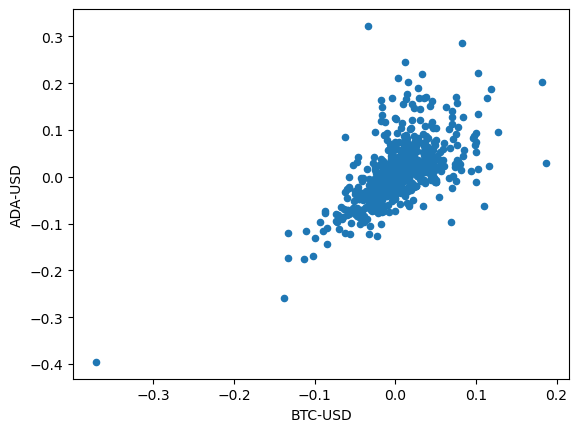

In [4]:
df.pct_change(1).plot.scatter(x= 'BTC-USD', y= 'ADA-USD')
plt.show()

In [5]:
df_ret = df.pct_change(1)

In [6]:
df_ret

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
Date,,,,,,,
2019-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,0.031147,0.019193,-0.008722,0.021544,NaN,NaN,0.029788
2019-11-05,0.025257,-0.007446,0.003825,0.015824,-0.001106,0.000920,0.004394
2019-11-06,0.014167,0.001964,0.001524,0.012095,0.000228,-0.001838,0.029314
2019-11-07,-0.029340,-0.009969,0.036910,-0.018880,0.003517,0.011050,-0.056936
...,...,...,...,...,...,...,...
2021-10-30,-0.027217,-0.005450,-0.067771,-0.020181,0.000000,0.000000,0.002262
2021-10-31,0.003885,-0.009208,0.044342,-0.008687,0.000000,0.000000,0.027029
2021-11-01,-0.007646,-0.005130,-0.030388,0.008524,0.001720,-0.005155,-0.018307


In [7]:
X = df_ret['BTC-USD']
y = df_ret['ADA-USD']

In [8]:
X.dropna(inplace= True)
y.dropna(inplace= True)

In [9]:
m, c = np.polyfit(X, y, 1)

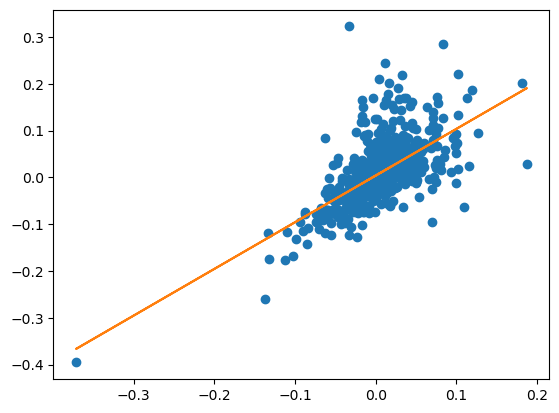

In [10]:
plt.plot(X, y, 'o')
plt.plot(X, m*X+c)
plt.show()

In [11]:
df_ret[(df_ret['BTC-USD'] < - 0.15)]

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
Date,,,,,,,
2020-03-12,-0.395672,-0.371695,-0.296245,-0.423472,-0.095677,-0.102941,-0.328988


In [12]:
df_ret[(df_ret['BTC-USD'] >  0.15)]

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
Date,,,,,,,
2020-03-19,0.201887,0.181878,0.132184,0.189404,0.002125,0.011628,0.153298
2021-02-08,0.029059,0.187465,0.000546,0.082014,0.007222,0.006564,0.071165


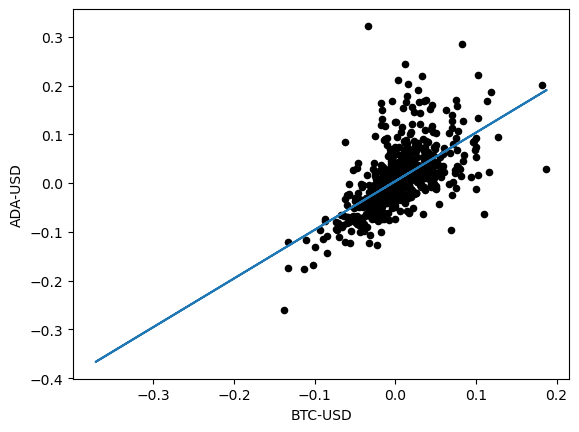

In [13]:
df_ret = df_ret[~(df_ret['BTC-USD'] < -0.15)]
m, c = np.polyfit(X, y, 1)
df_ret.plot.scatter(x= 'BTC-USD', y= 'ADA-USD', c= 'k')
plt.plot(X, m*X+c)
plt.show()

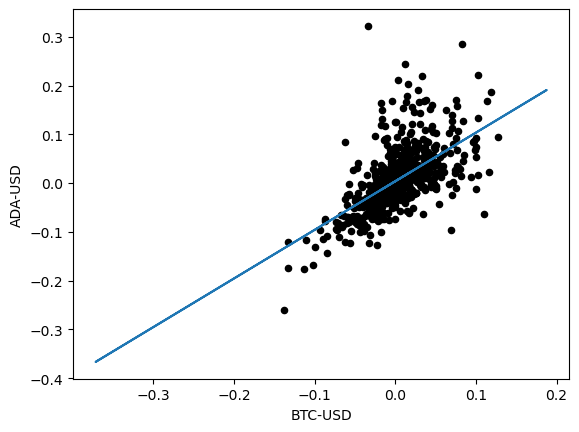

In [14]:
df_ret = df_ret[~(df_ret['BTC-USD'] > 0.15)]
m, c = np.polyfit(X, y, 1)
df_ret.plot.scatter(x= 'BTC-USD', y= 'ADA-USD', c= 'k')
plt.plot(X, m*X+c)
plt.show()

In [16]:
df_ret[(df_ret['ADA-USD'] > 0.25)]

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
Date,,,,,,,
2021-01-06,0.284863,0.083311,0.054939,0.097369,0.005979,-0.007463,0.106483
2021-02-10,0.322384,-0.033625,0.040331,-0.013457,-0.000436,-0.004324,0.066641


In [18]:
df_ret[(df_ret['ADA-USD'] < -0.25)]

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
Date,,,,,,,
2021-05-19,-0.260094,-0.137661,-0.300331,-0.272003,-0.002622,-0.004287,-0.327158


In [49]:
# cut alpha ออก เพราะจะทำให้ ความสัมพันธ์เสีย
ada_alpha = df_ret.loc[(df_ret['BTC-USD'] < 0) &  (df_ret['ADA-USD'] > 0.1)]
ada_alpha

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
Date,,,,,,,
2020-07-07,0.117210,-0.013140,0.181193,-0.010081,-0.010314,-0.001104,-0.020046
2020-09-25,0.169057,-0.004026,0.023449,0.008030,0.016167,-0.001253,0.037710
2020-11-06,0.124863,-0.000897,0.054643,0.098177,-0.000228,0.005025,0.051547
2021-01-16,0.164989,-0.017576,-0.011100,0.052655,0.000000,0.000000,-0.000777
2021-02-10,0.322384,-0.033625,0.040331,-0.013457,-0.000436,-0.004324,0.066641
2021-02-26,0.150113,-0.016012,0.006239,-0.020106,-0.005153,0.000000,-0.015244
2021-05-06,0.118327,-0.017893,-0.116827,-0.009056,0.007986,0.015250,-0.008629
2021-08-10,0.131917,-0.016831,0.001666,-0.008260,0.001244,0.002205,0.039941


In [60]:
no_alpha = df_ret.loc[~((df_ret['BTC-USD'] < 0) & (df_ret['ADA-USD'] > 0.10))]
no_alpha = no_alpha[~(df_ret['ADA-USD'] > 0.20)]
no_alpha = no_alpha.loc[~((df_ret['BTC-USD'] > 0.05) & (df_ret['ADA-USD'] < 0.10))]
no_alpha = no_alpha.loc[~((df_ret['BTC-USD'] > 0.05) & (df_ret['ADA-USD'] < 0.15))]

<ipython-input-60-7eff19557d28>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_alpha = no_alpha[~(df_ret['ADA-USD'] > 0.20)]


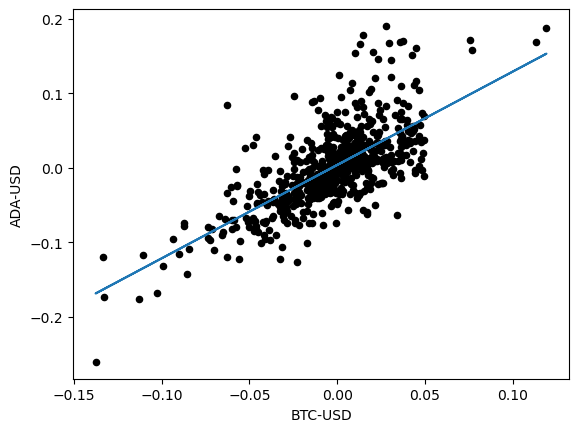

In [61]:
X = no_alpha['BTC-USD'].dropna()
y = no_alpha['ADA-USD'].dropna()

m, c = np.polyfit(X, y, 1)
no_alpha.plot.scatter(x= 'BTC-USD', y= 'ADA-USD', c= 'k')
plt.plot(X, m*X+c)
plt.show()

In [56]:
no_alpha[(df_ret['ADA-USD'] > 0.20)]

<ipython-input-56-3f5b53017d53>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_alpha[(df_ret['ADA-USD'] > 0.20)]


,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
Date,,,,,,,


In [57]:
no_alpha.loc[~((df_ret['BTC-USD'] > 0.05) & (df_ret['ADA-USD'] < 0.10))]

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
Date,,,,,,,
2020-04-23,0.110670,0.043910,0.017902,0.013303,-0.000072,0.009501,0.019902
2020-05-28,0.169907,0.037548,0.005578,0.052556,-0.001845,0.001124,0.013838
2020-05-30,0.190195,0.027682,0.032780,0.098201,0.000000,0.000000,0.039688
2020-07-01,0.154459,0.009885,0.014655,0.021202,0.007005,0.006803,0.006289
2020-07-08,0.105092,0.019028,0.537217,0.031766,0.007649,-0.011050,0.107719
2020-07-25,0.177950,0.014703,0.004348,0.088968,0.000000,0.000000,0.049268
2020-11-20,0.116751,0.045138,0.025077,0.080814,-0.006848,0.016873,0.080002
2020-11-21,0.124499,0.001123,0.175268,0.077965,0.000000,0.000000,0.397101
2020-11-28,0.168498,0.035597,0.039695,0.040070,0.000000,0.000000,0.118644
